In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import keras

import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [19]:
df1 = pd.read_csv("bef_data_1.csv")
df2 = pd.read_csv("bef_data_2.csv")
df3 = pd.read_csv("bef_data_3.csv")
df4 = pd.read_csv("bef_data_4.csv")
df5 = pd.read_csv("bef_data_5.csv")

#df1 = df1.set_index('time')
#df1.columns = ['Temp1', 'Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6', 'Temp7', 'Temp8', 'Temp9', 'Temp10']
#df1

In [20]:
def shaper(arr, n_time = 1):
    arr = arr.values.tolist()
    shape_list = []
    for i in range(0, len(arr) - n_time, 1):
        time_list = []
        for j in range(n_time):
            time_list +=arr[i + j]
        shape_list.append(time_list)
        
    columns = []
    for i in range((-n_time)+1,1,1):
        columns += ["Temp1_" + str(i), 
                    "Temp2_" + str(i), 
                    "Temp3_" + str(i), 
                    "Temp4_" + str(i), 
                    "Temp5_" + str(i), 
                    "Temp6_" + str(i), 
                    "Temp7_" + str(i), 
                    "Temp8_" + str(i), 
                    "Temp9_" + str(i), 
                    "Temp10_" + str(i),
                    #'cond1_off_' + str(i),
                    #'c1_16h_' + str(i), 
                    #'c1_16l_' + str(i), 
                    #'c1_23h_' + str(i), 
                    #'c1_23l_' + str(i), 
                    #'c1_30h_' + str(i), 
                    #'c1_30l_' + str(i), 
                    #'cond2_off_' + str(i), 
                    #'c2_16h_' + str(i), 
                    #'c2_16l_' + str(i), 
                    #'c2_23h_' + str(i), 
                    #'c2_23l_' + str(i), 
                    #'c2_30h_' + str(i), 
                    #'c2_30l_' + str(i)
                   ]
    
    td = pd.DataFrame(shape_list, columns = columns)
    return td

def union_shaper(df_list, n_time = 1):
    frames = []
    for i in range(len(df_list)):
        df = pd.DataFrame(df_list[i], columns = ["time", "Temp1","Temp2", "Temp3", "Temp4", "Temp5", "Temp6", "Temp7", "Temp8", "Temp9", "Temp10"])
        df = df.set_index('time')
        df.columns = ['Temp1', 'Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6', 'Temp7', 'Temp8', 'Temp9', 'Temp10']
        df = shaper(df, n_time)
        
        df['Temp1+1'] = df['Temp1_0'].shift(-1)
        df['Temp2+1'] = df['Temp2_0'].shift(-1)
        df['Temp3+1'] = df['Temp3_0'].shift(-1)
        df['Temp4+1'] = df['Temp4_0'].shift(-1)
        df['Temp5+1'] = df['Temp5_0'].shift(-1)
        df['Temp6+1'] = df['Temp6_0'].shift(-1)
        df['Temp7+1'] = df['Temp7_0'].shift(-1)
        df['Temp8+1'] = df['Temp8_0'].shift(-1)
        df['Temp9+1'] = df['Temp9_0'].shift(-1)
        df['Temp10+1'] = df['Temp10_0'].shift(-1)

        df['Temp1+1'].fillna(24, inplace=True)
        df['Temp2+1'].fillna(24, inplace=True)
        df['Temp3+1'].fillna(24, inplace=True)
        df['Temp4+1'].fillna(24, inplace=True)
        df['Temp5+1'].fillna(24, inplace=True)
        df['Temp6+1'].fillna(24, inplace=True)
        df['Temp7+1'].fillna(24, inplace=True)
        df['Temp8+1'].fillna(24, inplace=True)
        df['Temp9+1'].fillna(24, inplace=True)
        df['Temp10+1'].fillna(24, inplace=True)
        frames.append(df)
    return pd.concat(frames, ignore_index=True)

In [26]:
N_TIME = 12
df = union_shaper([df1, df2, df3, df4, df5], N_TIME)
df

,Temp1_-11,Temp2_-11,Temp3_-11,Temp4_-11,Temp5_-11,Temp6_-11,Temp7_-11,Temp8_-11,Temp9_-11,Temp10_-11,...,Temp1+1,Temp2+1,Temp3+1,Temp4+1,Temp5+1,Temp6+1,Temp7+1,Temp8+1,Temp9+1,Temp10+1
0,28,27,27,27,28,27,27,28,27,27,...,25.0,25.0,25.0,25.0,26.0,25.0,25.0,26.0,25.0,25.0
1,27,27,27,27,28,27,27,28,27,27,...,25.0,25.0,25.0,26.0,26.0,25.0,25.0,26.0,25.0,25.0
2,27,27,27,27,27,26,26,27,27,27,...,25.0,25.0,25.0,25.0,26.0,25.0,25.0,26.0,25.0,25.0
3,27,26,26,27,27,26,26,27,27,27,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,26.0,25.0,25.0
4,27,26,26,26,27,26,26,27,27,27,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,26.0,25.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,24,23,23,23,24,23,23,24,23,23,...,25.0,24.0,24.0,24.0,25.0,24.0,24.0,25.0,25.0,25.0
942,24,23,23,23,24,23,23,24,23,23,...,25.0,24.0,24.0,25.0,25.0,24.0,25.0,25.0,25.0,25.0
943,24,23,23,24,24,23,23,24,23,23,...,25.0,24.0,25.0,25.0,25.0,24.0,25.0,25.0,25.0,25.0
944,23,22,23,23,23,22,22,23,23,23,...,25.0,24.0,25.0,25.0,26.0,25.0,25.0,25.0,25.0,25.0


In [27]:
x = df.drop(['Temp1+1', 'Temp2+1', 'Temp3+1', 'Temp4+1', 'Temp5+1', 'Temp6+1', 'Temp7+1', 'Temp8+1', 'Temp9+1', 'Temp10+1'], axis = 1)
y = df[['Temp1+1', 'Temp2+1', 'Temp3+1', 'Temp4+1', 'Temp5+1', 'Temp6+1', 'Temp7+1', 'Temp8+1', 'Temp9+1', 'Temp10+1']]

y=np.reshape(y.values, (-1,10))

scaler_x = MinMaxScaler()
print(scaler_x.fit(x))
scaler_y = MinMaxScaler()
print(scaler_y.fit(y))

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


# Variants

In [28]:
X_train = scaler_x.transform(x)
y_train = scaler_y.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2)

xscale=scaler_x.transform(x)
yscale=scaler_y.transform(y)

X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, train_size = 1)

# Neural Link

In [29]:
model = Sequential()
model.add(Dense(128, input_dim=10 * N_TIME, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(256, activation='linear'))
model.add(Dense(10, activation='tanh'))
model.summary()
# Use a custom metricfunction

loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
model.compile(loss='hinge', optimizer='adam', metrics = ['accuracy'])

fit = model.fit(X_train, y_train, epochs=1000,  verbose=1, validation_split=0.5)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               15488     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
Total params: 51,082
Trainable params: 51,082
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
12/12 [==============================] - 0s 8ms/step - loss: 0.6765 - accuracy: 0.2884 - val_loss: 0.5604 - val_accuracy: 0.1190
Epoch 2/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5708 - accuracy: 0.0899 - val_loss: 0.5581 - val_accuracy: 0.0661
Epoch 3/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5700 - accuracy: 0.0

12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 54/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 55/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 56/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 57/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 58/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 59/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 60/1000

12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 111/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 112/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 113/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 114/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 115/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 116/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 1

Epoch 167/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 168/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 169/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 170/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 171/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 172/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 173/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy:

12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 224/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 225/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 226/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 227/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 228/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 229/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 2

Epoch 280/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 281/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 282/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 283/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 284/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 285/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 286/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy:

Epoch 337/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2672
Epoch 338/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2698
Epoch 339/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2698
Epoch 340/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2698
Epoch 341/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2698
Epoch 342/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2698
Epoch 343/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy:

Epoch 394/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2698
Epoch 395/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2698
Epoch 396/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2698
Epoch 397/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2698
Epoch 398/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2698
Epoch 399/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2698
Epoch 400/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy:

Epoch 451/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 452/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 453/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 454/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 455/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 456/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 457/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy:

12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 508/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2725
Epoch 509/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 510/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 511/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 512/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2725
Epoch 513/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 5

Epoch 564/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 565/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.5694 - accuracy: 0.2725 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 566/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 567/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 568/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 569/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 570/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2698 - val_loss: 0.5577 - val_accuracy:

Epoch 621/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 622/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 623/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 624/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 625/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 626/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 627/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy:

Epoch 678/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2778
Epoch 679/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2778
Epoch 680/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2778
Epoch 681/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2778
Epoch 682/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2778
Epoch 683/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2778
Epoch 684/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy:

Epoch 735/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 736/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 737/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 738/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 739/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 740/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 741/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy:

Epoch 792/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 793/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 794/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 795/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 796/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 797/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 798/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2672 - val_loss: 0.5577 - val_accuracy:

Epoch 849/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 850/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 851/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2619 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 852/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 853/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 854/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 855/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2619 - val_loss: 0.5577 - val_accuracy:

Epoch 906/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 907/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2619 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 908/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 909/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 910/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 911/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2619 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 912/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2619 - val_loss: 0.5577 - val_accuracy:

Epoch 963/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 964/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 965/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 966/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 967/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 968/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy: 0.2751
Epoch 969/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.2646 - val_loss: 0.5577 - val_accuracy:

In [10]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

6/6 [==============================] - 0s 1ms/step - loss: 0.5585 - accuracy: 0.1789
Доля верных ответов на тестовых данных, в процентах: 17.8947


In [11]:
def pred_plot(x, y, p, index):
    mpl.rcParams['figure.figsize'] = (4, 3)
    mpl.rcParams['axes.grid'] = False
    
    history = np.transpose(np.reshape(x[index], (-1, 10)))
    
    length = history.shape[1]
    #np.reshape(X, (-1, 10))[-1].tolist()
    
    real = np.transpose(np.array(y[index]))
    
    pred = np.transpose(np.array(p[index]))
    
    for i in range(10):
        percent = (history[i].max() - history[i].min())
        result = (percent-abs(real[i] - pred[i]))/percent
        
        plt.plot(range(length), history[i], label='History')
        plt.plot(length, real[i], 'bo', label='Real')
        plt.plot(length, pred[i], 'rx', label='Predicted')
        plt.xlabel('Time')
        plt.ylabel('Temperature value')
        plt.legend(loc='upper left')
        plt.title('index: ' + str(index) + ', temp: ' + str(i+1) + '\npercent: ' + str(result*100))
        plt.show()  

In [12]:
scaler_x.inverse_transform(X_test[:2])

array([[25., 25., 25., 25., 25., 25., 25., 26., 25., 25., 25., 25., 25.,
        25., 25., 25., 25., 26., 25., 25., 25., 25., 25., 25., 25., 25.,
        25., 26., 25., 25., 25., 25., 25., 25., 25., 25., 25., 26., 25.,
        25., 25., 25., 25., 25., 25., 25., 25., 26., 25., 25., 26., 25.,
        25., 25., 26., 25., 25., 26., 25., 25., 26., 25., 25., 25., 26.,
        25., 25., 26., 26., 25., 26., 25., 25., 25., 26., 25., 25., 26.,
        25., 25., 26., 25., 25., 25., 26., 25., 25., 26., 26., 25., 26.,
        25., 25., 26., 26., 25., 25., 26., 26., 26., 27., 26., 27., 27.,
        27., 26., 27., 27., 27., 27., 27., 26., 27., 27., 28., 27., 27.,
        27., 27., 27.],
       [25., 24., 24., 25., 25., 24., 24., 25., 25., 25., 25., 24., 24.,
        25., 25., 24., 24., 25., 25., 25., 25., 24., 25., 25., 25., 24.,
        24., 25., 25., 25., 25., 24., 25., 25., 25., 24., 24., 25., 25.,
        25., 25., 24., 24., 25., 25., 24., 24., 25., 25., 25., 25., 24.,
        25., 25., 25., 24.,

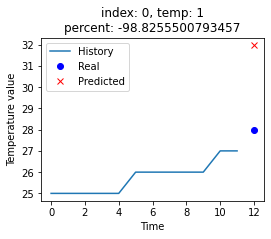

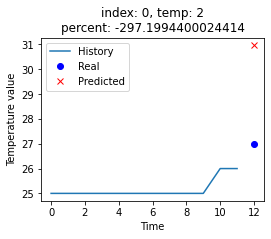

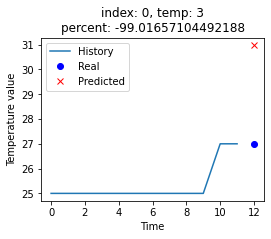

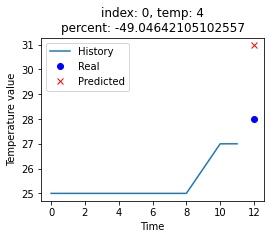

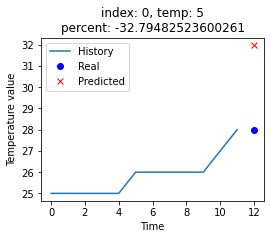

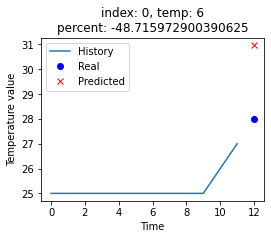

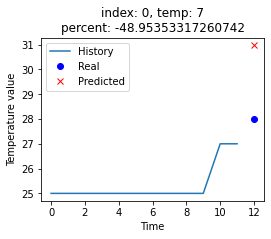

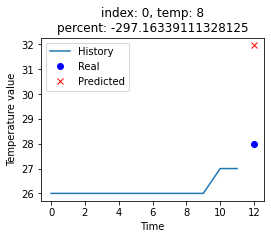

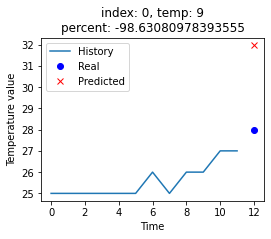

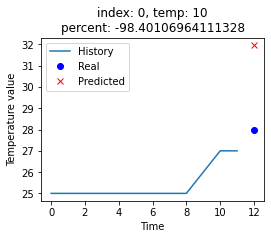

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


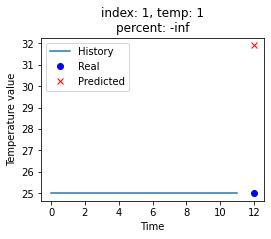

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


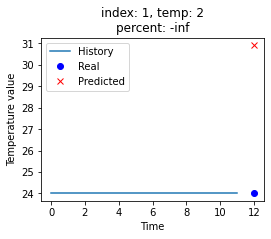

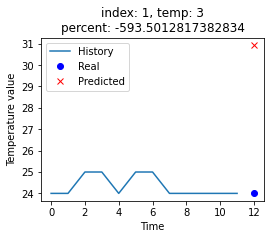

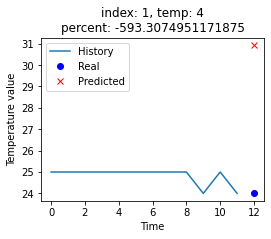

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


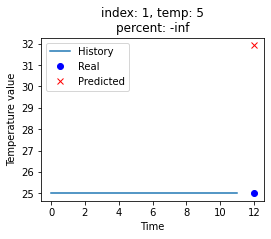

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


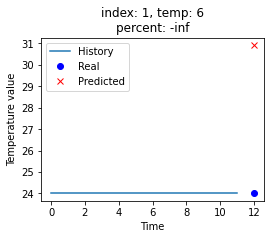

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


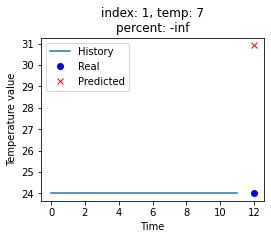

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


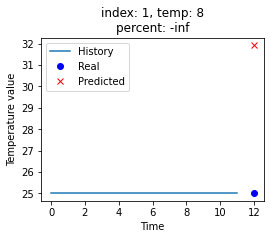

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


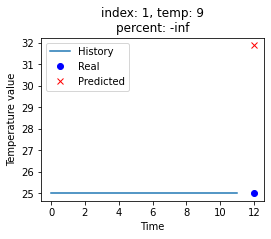

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


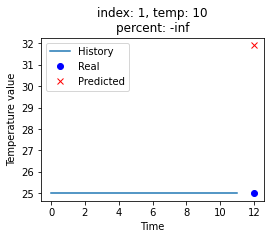

In [13]:
for i in range(2):
    pred_plot(scaler_x.inverse_transform(X_test[:i+1]),
              scaler_y.inverse_transform(y_test[:i+1]),
              scaler_y.inverse_transform(model.predict(X_test[:i+1])),
              i)

# Testing and Experiments

In [14]:
for i in range(5):
    print('test index:', i)
    true = scaler_x.inverse_transform(X_test[i:i+1])[0][(N_TIME - 1) * 10:(N_TIME - 1) * 10 + 10]
    print('True: ', true)

    ynew= model.predict(X_test)
    predict = scaler_y.inverse_transform(ynew[i:i+1])[0]
    print('Predicted: ', predict)

    result = []
    for j in range(len(true)):
        result.append([true[j], " - ", predict[j], " = ", abs(true[j] - predict[j])])
    
    for j in result:
        print(j)
    print("\n")

test index: 0
True:  [27. 26. 27. 27. 28. 27. 27. 27. 27. 27.]
Predicted:  [31.976511 30.971994 30.980331 30.980928 31.983849 30.97432  30.97907
 31.971634 31.972616 31.968018]
[27.0, ' - ', 31.976511, ' = ', 4.976511001586914]
[26.0, ' - ', 30.971994, ' = ', 4.971994400024414]
[27.0, ' - ', 30.980331, ' = ', 3.9803314208984375]
[27.0, ' - ', 30.980928, ' = ', 3.980928421020508]
[28.0, ' - ', 31.983849, ' = ', 3.9838485717773438]
[27.0, ' - ', 30.97432, ' = ', 3.9743194580078125]
[27.0, ' - ', 30.97907, ' = ', 3.9790706634521484]
[27.0, ' - ', 31.971634, ' = ', 4.9716339111328125]
[27.0, ' - ', 31.972616, ' = ', 4.972616195678711]
[27.0, ' - ', 31.968018, ' = ', 4.968017578125]


test index: 1
True:  [25. 24. 24. 24. 25. 24. 24. 25. 25. 25.]
Predicted:  [31.909058 30.919422 30.935013 30.933075 31.930208 30.91899  30.927198
 31.926426 31.90049  31.913363]
[25.0, ' - ', 31.909058, ' = ', 6.9090576171875]
[24.000000000000004, ' - ', 30.919422, ' = ', 6.9194221496582]
[24.000000000000004, 

# Visualizations

In [15]:
def plot_train_history(history, title):
  mpl.rcParams['figure.figsize'] = (8, 6)
  mpl.rcParams['axes.grid'] = False
    
  loss = history.history['loss']
  val_loss = history.history['val_loss']
    
  epochs = range(len(loss))

  y = []
  for i in epochs:
        y.append(0)

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.plot(epochs, y, 'g', label='y = 0 axis')
  plt.xlabel('Epochs')
  plt.ylabel('MSE value or Losses')
    
  plt.title(title)
  plt.legend()

  plt.show()

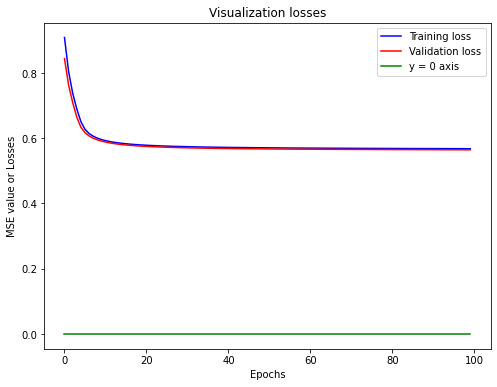

In [16]:
plot_train_history(fit,
                   'Visualization losses')